## Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

Dataset: https://github.com/zalandoresearch/fashion-mnist

* Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.
* Each example is a 28x28 grayscale image, associated with a label from 10 classes.
* Label	Description
    + 0	T-shirt/top
    + 1	Trouser
    + 2	Pullover
    + 3	Dress
    + 4	Coat
    + 5	Sandal
    + 6	Shirt
    + 7	Sneaker
    + 8	Bag
    + 9	Ankle boot

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

## Analyzing the dataset

In [3]:
training_images[0].shape

(28, 28)

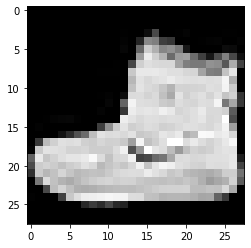

In [4]:
plt.imshow(training_images[0], 'gray')

In [5]:
print('Min: ', min(map(min, training_images[0])))
print('Max: ', max(map(max, training_images[0])))

Min:  0
Max:  255


Random 25 Images from the Training Data:


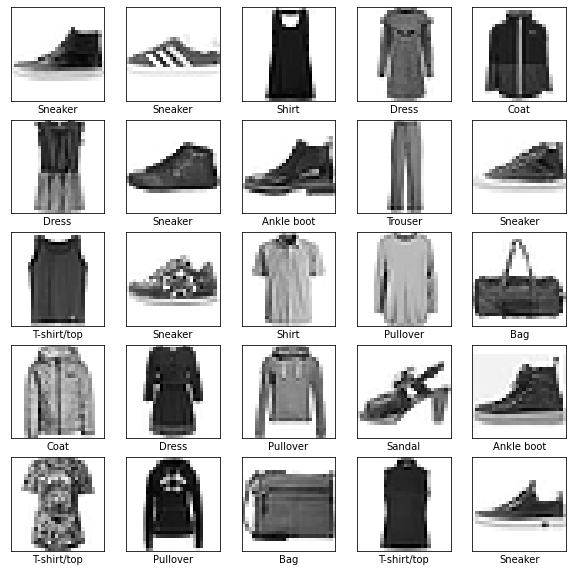

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Random 25 Images from the Training Data:")
plt.figure(figsize=(10, 10))
for i in range(25):
    rand_image_idx = np.random.randint(0, training_labels.shape[0])
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(training_images[rand_image_idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[rand_image_idx]])

Text(0.5, 1.0, 'Test labels frequency')

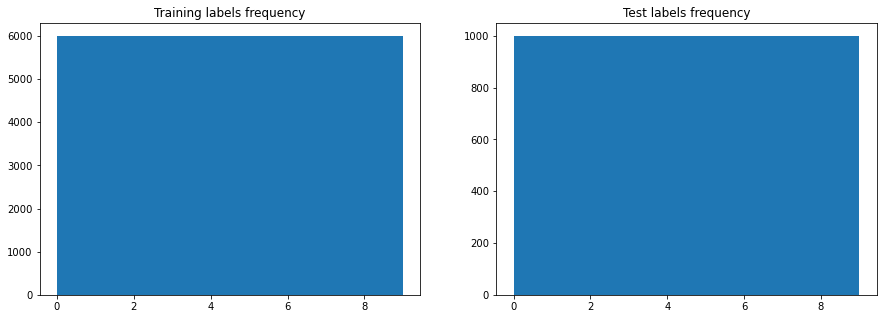

In [7]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(training_labels)
plt.title('Training labels frequency')

plt.subplot(1, 2, 2)
plt.hist(test_labels)
plt.title('Test labels frequency')

## Normalizing the images

In [8]:
training_images = training_images/255.0
test_images = test_images/255.0

## Customizing dimensions

* Conv2D expects tensor format i.e., (batch_size, height, width, depth)

In [9]:
# training_images = np.expand_dims(training_images, 3).shape
training_images = training_images.reshape(60000, 28, 28, 1)
training_images.shape

(60000, 28, 28, 1)

In [10]:
# test_images = np.expand_dims(test_images, 3).shape
test_images = test_images.reshape(10000, 28, 28, 1)
test_images.shape

(10000, 28, 28, 1)

## Creating the model

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),   # for avoiding overfitting
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

## Model Summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

## Compiling the model

In [13]:
# # customing optimizer
# adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)  # Default parameters

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

* categorical_crossentropy => expects that we have one-hot encoded the targets
* sparse_categorical_crossentropy => applies one-hot encoding

## Training the model

In [15]:
# # custom callback to end training after given condition
# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('loss')<0.4):
#             print("\nLoss is low so cancelling training!")
#             self.model.stop_training = True
            
# early_stopping = myCallback()

In [16]:
# # This callback will stop the training when there is no improvement in validation loss for two consecutive epochs.
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [17]:
# # callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='model/cp.ckpt',
#                                                  monitor='val_loss',
#                                                  save_weights_only=True,
#                                                  save_best_only=False,
#                                                  save_freq='epoch',
#                                                  verbose=1)

In [18]:
# history = model.fit(x=training_images, y=training_labels, epochs=10, callbacks=[early_stopping, cp_callback])
history = model.fit(x=training_images, y=training_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 46s 775us/sample - loss: 0.5347 - acc: 0.8033 - loss: 0.5352 - acc: 0.80
Epoch 2/10
60000/60000 [==============================] - 47s 777us/sample - loss: 0.3430 - acc: 0.8751
Epoch 3/10
60000/60000 [==============================] - 46s 760us/sample - loss: 0.2989 - acc: 0.8887
Epoch 4/10
60000/60000 [==============================] - 46s 760us/sample - loss: 0.2699 - acc: 0.9003
Epoch 5/10
60000/60000 [==============================] - 46s 763us/sample - loss: 0.2472 - acc: 0.9088
Epoch 6/10
60000/60000 [==============================] - 46s 763us/sample - loss: 0.2313 - acc: 0.9140
Epoch 7/10
60000/60000 [==============================] - 46s 769us/sample - loss: 0.2158 - acc: 0.9189
Epoch 8/10
60000/60000 [==============================] - 47s 777us/sample - loss: 0.2024 - acc: 0.9238
Epoch 9/10
60000/60000 [==============================] - 47s 777us/sample - loss: 0.1920 - acc: 0.9281
Epoch 10/10
60

## Analyzing the trained model

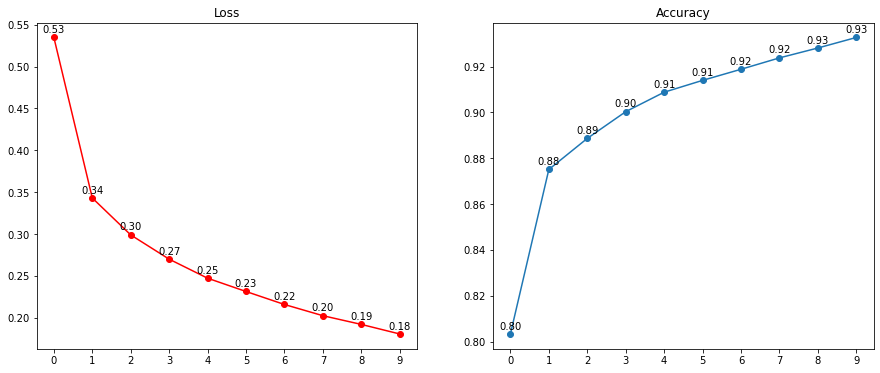

In [19]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r', marker='o')
plt.title('Loss')
plt.xticks(history.epoch)
for x, y in zip(history.epoch, history.history['loss']):
    label = "{:.2f}".format(y)
    plt.annotate(label,                               # this is the text
                 (x, y),                              # this is the point to label
                 textcoords="offset points",          # how to position the text
                 xytext=(0, 5),                       # distance from text to points (x,y)
                 ha='center')                         # horizontal alignment can be left, right or center

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], marker='o')
plt.title('Accuracy')
plt.xticks(history.epoch)
for x, y in zip(history.epoch, history.history['acc']):
    label = "{:.2f}".format(y)
    plt.annotate(label,                               # this is the text
                 (x, y),                              # this is the point to label
                 textcoords="offset points",          # how to position the text
                 xytext=(0, 5),                       # distance from text to points (x,y)
                 ha='center')                         # horizontal alignment can be left, right or center

## Visualizing intermediate activations

In [20]:
model.layers[0].output

<tf.Tensor 'conv2d/Identity:0' shape=(None, 26, 26, 32) dtype=float32>

In [21]:
# Extracts the outputs of the layers
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Returns a list of Numpy arrays: one array per layer activation
img_tensor = np.expand_dims(test_images[0], axis=0)
activations = activation_model.predict(img_tensor)

print('No. of layers: ', len(activations))

No. of layers:  9


In [22]:
first_layer_activation = activations[0]
first_layer_activation.shape
# output => (img_count, height, weight, filters_count)

(1, 26, 26, 32)

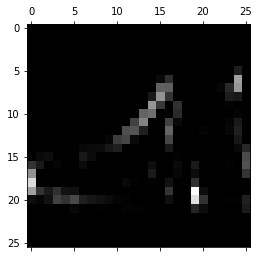

In [23]:
# plotting the fourth channel of the activation of the first layer of the original model
plt.matshow(first_layer_activation[0, :, :, 4], cmap='gray')

In [24]:
# images_per_row = 16
# n_features = 32
# size = 26
# n_cols = 32//16 = 2
# display_grid.shape = (26*2, 16*26) = (52, 416)
# channel_no = [0, 1, 2, ..., (1*16+15)]

e:\rohit\python3.7\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


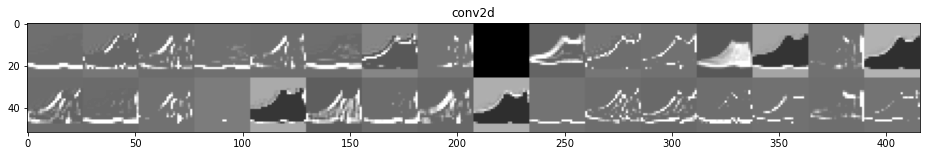

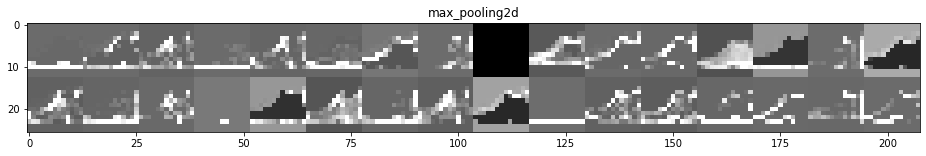

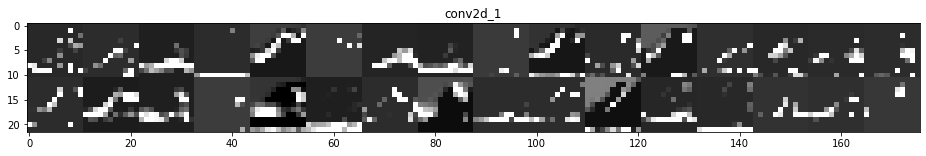

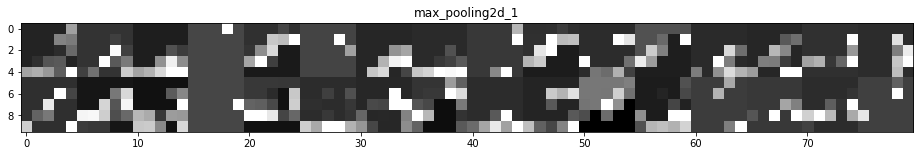

In [25]:
# Visualizing every channel in every intermediate activation of the given image
layer_names = []
for layer in model.layers[:4]:                        # considering conv and pool layers
    layer_names.append(layer.name)                    # Names of the layers, so you can have them as part of your plot

# Creates a model that will return these outputs, given the model input
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Returns a list of Numpy arrays: one array per layer activation
img_tensor = np.expand_dims(test_images[0], axis=0)
activations = activation_model.predict(img_tensor)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):  # Displays the feature maps
    n_features = layer_activation.shape[-1]                         # Number of features in the feature map
    size = layer_activation.shape[1]                                # feature map has shape (1, size, size, n_features)
    n_cols = n_features // images_per_row                           # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):                                       # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()           # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,              # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')

As we go deeper in the layers, the activations become increasingly abstract and less visually interpretable. They begin to encode higher-level concepts such as single borders, corners and angles. Higher presentations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image.

## Testing the model

In [26]:
# outputs based on model
pred1 = model.predict(test_images)
pred1

array([[1.9573733e-11, 3.2428171e-11, 2.9863478e-10, ..., 8.2822073e-05,
        1.3587887e-12, 9.9991715e-01],
       [6.2573747e-07, 7.0432660e-14, 9.9984288e-01, ..., 1.6289286e-14,
        1.2494684e-08, 6.4910824e-15],
       [4.6887727e-13, 1.0000000e+00, 1.4132843e-16, ..., 1.2591514e-23,
        2.4370480e-18, 6.6037644e-19],
       ...,
       [1.3124150e-09, 7.0800175e-13, 2.6091588e-12, ..., 1.7202370e-10,
        1.0000000e+00, 7.1227416e-12],
       [1.0188008e-13, 1.0000000e+00, 3.3336642e-13, ..., 1.1149858e-21,
        1.2160142e-17, 4.1836844e-19],
       [8.3737150e-06, 3.3185015e-07, 2.9123200e-08, ..., 1.8638582e-04,
        4.3683914e-03, 8.0091222e-06]], dtype=float32)

In [27]:
pred1.shape

(10000, 10)

In [28]:
# label-based outputs
pred2 = model.predict_classes(test_images)
pred2

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [29]:
pred2.shape

(10000,)

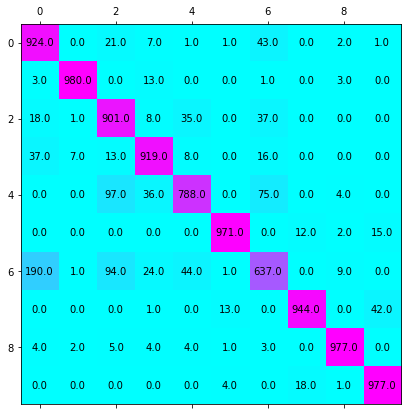

In [30]:
data = confusion_matrix(test_labels, pred2)

fig, ax = plt.subplots(figsize=(10, 7))
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='cool')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [31]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 3s 293us/sample - loss: 0.2829 - acc: 0.9018


[0.28291607479453085, 0.9018]

## Saving & Loading the Model

* The key difference between HDF5 and SavedModel is that HDF5 uses object configs to save the model architecture, while SavedModel saves the execution graph.
* Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the orginal code.

In [32]:
# saving whole model
# model.save('model')      # SavedModel format
model.save('model.h5')   # The '.h5' extension indicates that the model should be saved to HDF5.

In [33]:
# loading the model
# new_model = tf.keras.models.load_model('model')
new_model = tf.keras.models.load_model('model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [34]:
# saving only weights
# model.save_weights('model/cp.ckpt')    # SavedModel format
model.save_weights('cp.h5')            # The '.h5' extension indicates that the model should be saved to HDF5.

In [35]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 2.85500020e-01,  2.17450574e-01,  1.12006716e-01,
            1.35557771e-01, -7.41722286e-02,  1.07999295e-01,
           -9.32546705e-02,  1.36712473e-02, -1.05349779e-01,
           -3.52670014e-01, -4.92103815e-01,  2.58475691e-02,
            3.41440886e-02,  1.83155671e-01,  1.17094293e-01,
           -1.66968703e+00, -8.40292946e-02,  5.28747700e-02,
           -4.68255766e-02, -5.78023158e-02, -2.55490214e-01,
           -1.65465236e-01,  3.23589265e-01, -2.36445680e-01,
           -4.71240610e-01,  8.41259882e-02,  1.85844466e-01,
           -4.50724632e-01,  2.91304171e-01, -3.20449233e-01,
            7.69094005e-02, -1.29548207e-01]],
 
         [[ 2.29223788e-01, -3.64056587e-01, -1.78258181e-01,
            1.92479342e-01,  1.54885620e-01,  2.55537003e-01,
           -5.23112774e-01,  1.48387253e-02,  5.69363385e-02,
           -4.08566475e-01,  2.50380516e-01, -3.25272113e-01,
         

In [36]:
# loading the weights
new_weighted_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),   # for avoiding overfitting
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='sigmoid')
])

# new_weighted_model.load_weights('model/cp.ckpt')
new_weighted_model.load_weights('cp.h5')
new_weighted_model.weights

[<tf.Variable 'conv2d_2_1/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 2.85500020e-01,  2.17450574e-01,  1.12006716e-01,
            1.35557771e-01, -7.41722286e-02,  1.07999295e-01,
           -9.32546705e-02,  1.36712473e-02, -1.05349779e-01,
           -3.52670014e-01, -4.92103815e-01,  2.58475691e-02,
            3.41440886e-02,  1.83155671e-01,  1.17094293e-01,
           -1.66968703e+00, -8.40292946e-02,  5.28747700e-02,
           -4.68255766e-02, -5.78023158e-02, -2.55490214e-01,
           -1.65465236e-01,  3.23589265e-01, -2.36445680e-01,
           -4.71240610e-01,  8.41259882e-02,  1.85844466e-01,
           -4.50724632e-01,  2.91304171e-01, -3.20449233e-01,
            7.69094005e-02, -1.29548207e-01]],
 
         [[ 2.29223788e-01, -3.64056587e-01, -1.78258181e-01,
            1.92479342e-01,  1.54885620e-01,  2.55537003e-01,
           -5.23112774e-01,  1.48387253e-02,  5.69363385e-02,
           -4.08566475e-01,  2.50380516e-01, -3.25272113e-01,
     

## Testing a single image

In [37]:
# # custom image path from directory
# img_path = 'ab.jpg'
# img = tf.keras.preprocessing.image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# img_tensor = tf.keras.preprocessing.image.img_to_array(img)
# img_tensor = img_tensor/255.0

In [38]:
# considering test image
img_tensor = test_images[4]

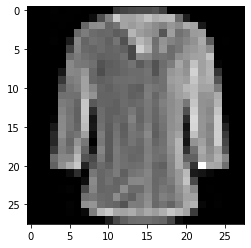

In [39]:
plt.imshow(img_tensor.reshape(28, 28), 'gray')

In [40]:
img_tensor = np.expand_dims(img_tensor, axis=0)

In [41]:
model.predict_classes(img_tensor)

array([0], dtype=int64)